In [3]:
!pip install kaggle
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [5]:
import json
token = {"username":"fatemehy","key":"e6177841494493a99d3da8b61bab2fb1"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets list

- path is now set to: {/content}
ref                                                             title                                                size  lastUpdated          downloadCount  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge               COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-06-10 00:09:23           3259  
roche-data-science-coalition/uncover                            UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53           3303  
kwullum/fatal-police-shootings-in-the-us                        Fatal Police Shootings in the US                      1MB  2017-09-22 19:18:21          15572  
Cornell-University/arxiv                                        ArXiv Metadata                                        2GB  2020-05-06 23:18:35             77  
longngu

In [6]:
!kaggle datasets list -s insurance
!kaggle datasets download -d mirichoi0218/insurance     -p /content
!unzip \*.zip

ref                                                 title                                       size  lastUpdated          downloadCount  
--------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  
hhs/health-insurance-marketplace                    Health Insurance Marketplace               829MB  2017-05-01 20:16:50           8584  
hhs/health-insurance                                Health Insurance Coverage                    3KB  2017-03-02 18:40:23           4165  
uciml/caravan-insurance-challenge                   Caravan Insurance Challenge                266KB  2016-11-28 03:02:55           5166  
moneystore/agencyperformance                        Insurance Data                               5MB  2016-12-02 12:13:42           3867  
mhdzahier/travel-insurance                          Travel Insurance                           463KB  2019-01-28 01:43:39           2494  
mirichoi0218/insurance     

In [8]:
# Load data into Pandas Dataframe
import pandas as pd
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
#Does the dataset include any missing values? If so, delete the missing values entries
df.isnull().sum(axis = 0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
#Preprocessing
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['sex'])
df['sex']= encoder.transform(df['sex'])

encoder.fit(df['region'])
df['region']= encoder.transform(df['region'])

encoder.fit(df['smoker'])
df['smoker']= encoder.transform(df['smoker'])
# breast_cencer.drop('id',axis=1,inplace=True)
# df.drop('Unnamed: 32',axis=1,inplace=True)
# breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map({'M':1,'B':0})
# breast_cancer.head()

df.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [11]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

number of estimated clusters : 1323
number of estimated clusters : 1329
number of estimated clusters : 1306
[0 3 3 3 3]
k:  1  inertia:  196074539341.69006  Distance:  9091.212239518652
k:  2  inertia:  48015233363.63154  Distance:  4813.177900787527
k:  3  inertia:  22961315256.75049  Distance:  3416.271219969335
k:  4  inertia:  12124877867.45977  Distance:  2276.350394708472
k:  5  inertia:  8541856826.180521  Distance:  2014.2188049609165
k:  6  inertia:  6167037715.890656  Distance:  1615.0662786097625
k:  7  inertia:  4434721647.703516  Distance:  1391.2136198886371
k:  8  inertia:  3488608307.8939214  Distance:  1341.0436489426795
k:  9  inertia:  2779005965.02672  Distance:  1144.9634746175327


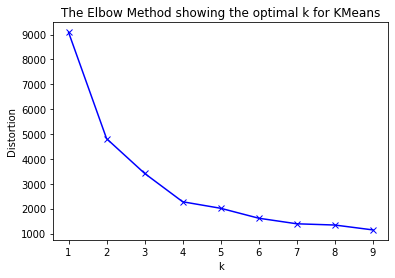

In [21]:
X=df
from sklearn.preprocessing import OneHotEncoder
encoded_X = OneHotEncoder().fit_transform(X).toarray()


#trying Mean shift with different bandwidth
from sklearn.cluster import MeanShift
# clusters = MeanShift(bandwidth=0.5).fit_predict(encoded_X)
ms = MeanShift(bandwidth=0.5, bin_seeding=True)
clusters=ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

from sklearn.cluster import MeanShift
# clusters = MeanShift(bandwidth=0.25).fit_predict(encoded_X)
ms = MeanShift(bandwidth=0.25, bin_seeding=True)
clusters=ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

from sklearn.cluster import MeanShift
# clusters = MeanShift(bandwidth=1).fit_predict(encoded_X)
ms = MeanShift(bandwidth=1, bin_seeding=True)
clusters=ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)



from sklearn.cluster import KMeans
clusters2 = KMeans(n_clusters=4, tol=1e-5, random_state=0).fit_predict(encoded_X)

print(clusters2[0:5])


#drawing elbow curve for Kmeans algorithm

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    print('k: ',k,' inertia: ',kmeanModel.inertia_,' Distance: ',sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for KMeans')
plt.show()

